<a href="https://colab.research.google.com/github/Amruthavalli19/Amruthavalli226Q1A4560/blob/main/Module_01_Lab_02_ML_Practice_i_p_y_n_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [2]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


bold text### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

Nearest Neighbor Classifier:

Increasing Validation Set Size: As you increase the percentage of the validation set, you typically get a more accurate estimate of the model's performance. A larger validation set provides a better representation of the data, which can help in better hyperparameter tuning. However, it reduces the size of the training set, potentially making it harder for the model to learn.
Decreasing Validation Set Size: Reducing the validation set size can lead to a less reliable estimate of model performance. The model may overfit to the training data because it has less data for validation and hyperparameter tuning.
Random Classifier:

Increasing Validation Set Size: With a random classifier, increasing the validation set size may not have a substantial impact on accuracy because the model's performance is random. However, you would still expect to see some variation due to the randomness in the data split.
Decreasing Validation Set Size: Similarly, reducing the validation set size may not significantly affect accuracy. The random classifier will perform poorly regardless of the validation set size.

In [21]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
X, y = np.random.rand(1000, 5), np.random.choice([0, 1], size=1000)
validation_percentages = [0.1, 0.2, 0.3, 0.4, 0.5]
for val_percentage in validation_percentages:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_percentage, random_state=42)
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    random_classifier = DummyClassifier(strategy="uniform")
    random_classifier.fit(X_train, y_train)
    knn_val_accuracy = knn_classifier.score(X_val, y_val)
    random_val_accuracy = random_classifier.score(X_val, y_val)
    print(f"Validation Percentage: {val_percentage * 100}%")
    print(f"Nearest Neighbor Validation Accuracy: {knn_val_accuracy:.2f}")
    print(f"Random Classifier Validation Accuracy: {random_val_accuracy:.2f}")
    print("=" * 30)


Validation Percentage: 10.0%
Nearest Neighbor Validation Accuracy: 0.55
Random Classifier Validation Accuracy: 0.50
Validation Percentage: 20.0%
Nearest Neighbor Validation Accuracy: 0.52
Random Classifier Validation Accuracy: 0.52
Validation Percentage: 30.0%
Nearest Neighbor Validation Accuracy: 0.46
Random Classifier Validation Accuracy: 0.50
Validation Percentage: 40.0%
Nearest Neighbor Validation Accuracy: 0.49
Random Classifier Validation Accuracy: 0.47
Validation Percentage: 50.0%
Nearest Neighbor Validation Accuracy: 0.50
Random Classifier Validation Accuracy: 0.46


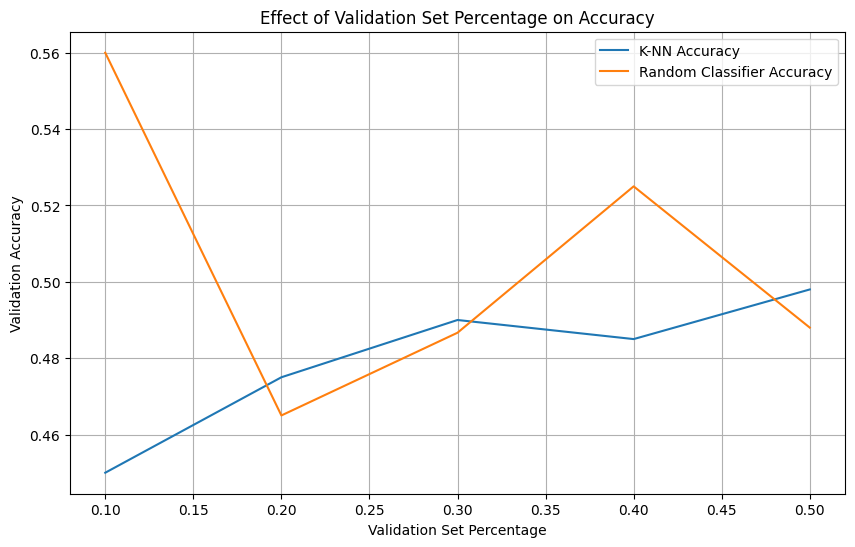

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
X, y = np.random.rand(1000, 5), np.random.choice([0, 1], size=1000)
validation_percentages = [0.1, 0.2, 0.3, 0.4, 0.5]

knn_accuracies = []
random_accuracies = []
for val_percentage in validation_percentages:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_percentage, random_state=42)
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    random_classifier = DummyClassifier(strategy="uniform")
    random_classifier.fit(X_train, y_train)
    knn_val_accuracy = knn_classifier.score(X_val, y_val)
    random_val_accuracy = random_classifier.score(X_val, y_val)

    knn_accuracies.append(knn_val_accuracy)
    random_accuracies.append(random_val_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(validation_percentages, knn_accuracies, label="K-NN Accuracy")
plt.plot(validation_percentages, random_accuracies, label="Random Classifier Accuracy")
plt.xlabel("Validation Set Percentage")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Validation Set Percentage on Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [13]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [14]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1.Does averaging the validation accuracy across multiple splits give more consistent results? Averaging the validation accuracy across multiple splits of your dataset can indeed give more consistent and reliable results compared to relying on a single split. This practice is often referred to as "cross-validation," and it helps assess the generalization performance of a machine learning model more effectively. Here's why it's beneficial:

Reduced Variance:
When you train and validate a model on a single data split (e.g., using a fixed train-validation/test split), your results may be highly sensitive to the specific data points in that split. Averaging results across multiple splits helps reduce this variance and provides a more stable estimate of the model's performance.

Better Generalization:
By repeatedly splitting your data into training and validation sets, you ensure that your model is evaluated on different subsets of the data.

Improved Hyperparameter Tuning:
Cross-validation is often used for hyperparameter tuning. By averaging results from multiple splits, you can make more informed decisions about which hyperparameters work best across different data subsets, leading to better model performance.

Common cross-validation techniques include k-fold cross-validation and stratified k-fold cross-validation, where the dataset is divided into k subsets (folds), and the model is trained and evaluated k times, with each fold serving as the validation set exactly once.

However, it's important to note that cross-validation can be computationally expensive, especially for large datasets or complex models. Additionally, it may not be suitable for all types of data or projects. In some cases, a single train-validation-test split may be sufficient, especially when dealing with limited data or when computational resources are constrained. Nevertheless, for most machine learning tasks, cross-validation is a valuable technique to assess and improve model performance while providing more consistent results.**bold text**

2.Does it give more accurate estimate of test accuracy?

Cross-validation, when done properly, can provide a more accurate estimate of how well your machine learning model is likely to perform on unseen data compared to a single train-validation-test split. However, it's important to clarify that cross-validation estimates the model's performance on validation data, not on the true, unseen test data.

Here's how cross-validation helps provide a more accurate estimate of the model's performance:

Reduced Bias:
A single train-validation-test split can introduce bias into your model evaluation because the specific random split might not berepresentative of the overall dataset. Cross-validation reduces this bias by repeatedly training and evaluating the model on different subsets of the data.

Better Utilization of Data:
Cross-validation allows you to use your entire dataset for both training and validation. In a typical k-fold cross-validation, each data point is used for validation exactly once, ensuring that all data is effectively utilized in assessing model performance.

Robustness:
Cross-validation helps in detecting overfitting. If your model performs exceptionally well on one random validation split but poorly on another, it suggests that it might not generalize well to unseen data, which is a valuable insight for model selection and hyperparameter tuning.

However, it's crucial to remember that while cross-validation provides a more accurate estimate of how well your model is likely to perform on validation data, it still doesn't directly estimate the model's performance on truly unseen data (i.e., the test data). Therefore, after model selection and hyperparameter tuning using cross-validation, you should assess your final model's performance on a separate, held-out test dataset to get an accurate estimate of its generalization performance.

In summary, cross-validation improves the estimate of how well your model will perform on validation data, but it doesn't replace the need for a separate test dataset to assess the model's performance on truly unseen data.**bold text**

3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

In the context of cross-validation for estimating model performance, the number of iterations (or folds) can impact the reliability of the estimate, but it's not necessarily the case that a higher number of iterations always leads to a better estimate. The relationship between the number of iterations and the quality of the estimate is more nuanced and depends on various factors:

Bias-Variance Trade-off:
Increasing the number of iterations typically reduces the variance of the estimate but might introduce bias. With a higher number of folds, each fold's validation set is smaller, which can lead to more variability in the estimates. However, with a lower number of folds, the estimate may be more biased because it's based on a smaller portion of the data.

Computational Cost:
Performing cross-validation with a large number of iterations can be computationally expensive, especially if the training process is time-consuming. In practical applications, you need to balance the computational cost with the benefit of a more precise estimate.

Sample Size:
If you have a small dataset, using a large number of folds can result in very small validation sets, which may lead to unstable estimates. In such cases, it's often recommended to use a smaller number of folds (e.g., 5 or 10) to ensure each fold contains a reasonable number of samples.

Data Characteristics:
The relationship between the number of iterations and the quality of the estimate can also depend on the nature of your data and the problem you're solving. Some datasets may benefit from a larger number of iterations, while others may not.

In practice, a common choice for the number of iterations is 5-fold or 10-fold cross-validation. These values strike a balance betweenreducing variance and maintaining a reasonable computational cost. If you have a very large dataset, you might consider using fewer folds, and if your dataset is very small, leave-one-out cross-validation (where each data point serves as a separate fold) could be an option.

In summary, the choice of the number of iterations in cross-validation is a trade-off between variance and bias, computational cost, and the characteristics of your data. There's no one-size-fits-all answer, and it's often necessary to experiment with different fold numbers to determine the best approach for your specific machine learning task.

4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
**bold text**
Increasing the number of iterations (folds) in cross-validation can help when dealing with a very small training dataset or validation dataset to some extent, but it may not fully mitigate the limitations of small data sizes. Here's how increasing iterations can affect the situation:

Smaller Validation Sets:
When you have a very small dataset, increasing the number of iterations can lead to smaller validation sets in each fold. While this can help utilize your limited data more effectively, it may also result in more variability in the performance estimates because each fold is based on a smaller subset of the data.

Reduced Bias: With more iterations, you are likely to obtain performance estimates that are less biased because you're using more diverse subsets of the data for validation. This can provide a better sense of how well your model generalizes.

Computational Cost:

Be mindful of the computational cost. Running a large number of iterations can become computationally expensive, especially if your training process is time-consuming.

Sample Size Limitations:
While increasing iterations can improve the situation, it doesn't magically increase the effective sample size of your dataset. If your training dataset is extremely small, cross-validation might still provide unreliable estimates because each fold's training set is limited.

Overfitting Risk:
If your training dataset is very small, increasing iterations can sometimes lead to overfitting on the training data because the model has moreopportunities to fit the idiosyncrasies of the small dataset.

In situations where your dataset is exceptionally small, you might consider alternative approaches, such as:

Data Augmentation:

If applicable, you can artificially increase the effective size of your training dataset by applying data augmentation techniques.

Transfer Learning:

Leveraging pre-trained models and fine-tuning them on your small dataset can be an effective strategy.

Regularization:

Use stronger regularization techniques to prevent overfitting when dealing with small datasets.

Ensemble Methods:

Combining the predictions of multiple models trained on different random splits of the small dataset can sometimes improve performance.

Ultimately, while increasing the number of iterations in cross-validation can help to some extent, it's essential to consider the limitations of a small dataset and explore various strategies to address those limitations beyond just adjusting the number of iterations.